In [26]:
import os
# os.chdir("/home/chowjunwei37/")
os.getcwd()

'/workspace/ariel_ml_2021/main_folder'

In [27]:
import numpy as np
import glob
import tensorflow as tf

In [28]:
def update_state(y_true, y_pred, sample_weight=None):  # score()
        """
        Return the unweighted score related to the challenge. 
        Taken from https://github.com/ucl-exoplanets/ML-challenge-baseline/blob/main/utils.py

        :param y_true: (float) The true label output. 
        :param y_pred: (float) The predicted output. 
        """

        # y_pred = tf.reshape(tf.argmax(y_pred, axis=1), shape=(-1, 1))
        # values = tf.cast(y_true, "int32") == tf.cast(y_pred, "int32")
        # values = tf.cast(values, "float32")

        y_true = tf.cast(y_true, "float32")
        y_pred = tf.cast(y_pred, "float32")

        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, "float32")
        else:
            sample_weight = tf.ones_like(y_true, dtype="float32")
        
        new_weight = 1e4 - (tf.reduce_sum(2 * (sample_weight * y_true * tf.math.abs(y_pred - y_true)), axis=None) / (tf.reduce_sum(sample_weight, axis=None)) * 1e6)
#         new_weight = tf.reduce_mean(sample_weight * y_true * tf.math.abs(y_pred - y_true))
        
#         print("Difference: ", np.array(new_weight))
        
        return new_weight

In [29]:
files = glob.glob("baseline_*.txt")
files

['baseline_evaluation_2021-06-03.txt',
 'baseline_evaluation_2021-06-09_8.txt',
 'baseline_evaluation_2021-06-09.txt',
 'baseline_evaluation_2021-06-04.txt',
 'baseline_evaluation_2021-06-09_9.txt',
 'baseline_evaluation_2021-06-14_12.txt',
 'baseline_evaluation_2021-06-14_10_5.txt',
 'baseline_evaluation_2021-06-02.txt',
 'baseline_evaluation_2021-06-15_13.txt']

In [30]:
our_avg = np.loadtxt("avg_our_best_results.txt")

others = [np.loadtxt(file) for file in files]
len(others)

9

In [31]:
[update_state(our_avg, other) for other in others]

[<tf.Tensor: shape=(), dtype=float32, numpy=9630.248>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9711.095>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9693.325>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9747.291>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9635.626>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9478.713>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9752.591>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9747.783>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9627.003>]

## Visualization 

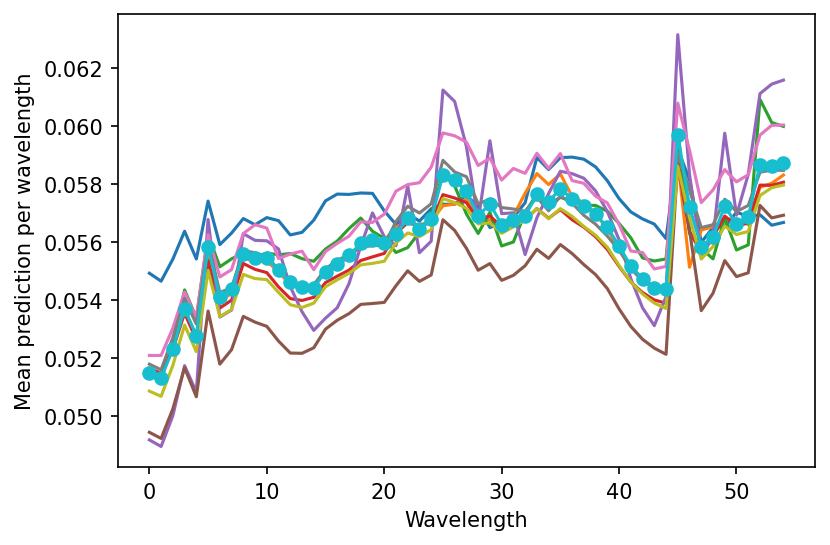

In [32]:
import matplotlib.pyplot as plt

picture = glob.glob("*.png")
prefix = len(picture)

plt.figure(dpi=150)
[plt.plot(other.mean(0)) for other in others]
plt.plot(our_avg.mean(0), "-o")
plt.xlabel("Wavelength")
plt.ylabel("Mean prediction per wavelength")
plt.savefig(f"Current_pred_{prefix}.png", dpi=800)

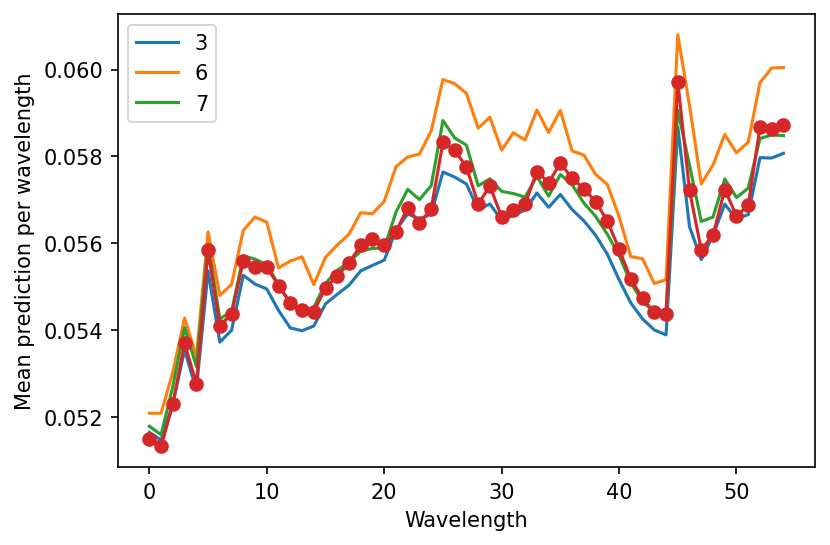

In [36]:
plt.figure(dpi=150)
[plt.plot(other.mean(0), label=ii) for ii, other in enumerate(others) if ii in [3, 7, 6]]
plt.plot(our_avg.mean(0), "-o")
plt.xlabel("Wavelength")
plt.ylabel("Mean prediction per wavelength")
plt.legend()

In [38]:
[print(ii) for ii, other in enumerate(others)]

0
1
2
3
4
5
6
7
8


[None, None, None, None, None, None, None, None, None]